##First Iteration

### **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


###Analyzing mnist dataset 
To proceed further with the convoution, it is always necessary to have a better understanding of how the dataset looks and what could be the prediction dataset.

(60000, 28, 28)


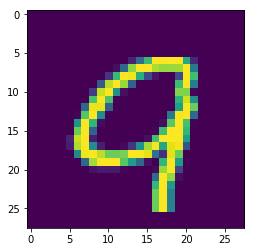

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
plt.imshow(X_train[15])
plt.imshow(X_train[500])
plt.imshow(X_train[3000])

###Data Pre-Processing

Now we need to reshape the images as the model expects. The last number 1 signifies that the image is in greyscale.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

We also need to analyzing the Class array and 'one-hot-encode' them to so that our model could make more sense out of it. 

We can see the sample of class array below:

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

after processing, we can see that the value of 5 is replaced by an array which signifies its value by keeping 1 in the 6th place (array starts by index 0) and rest of the array as 0.

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

###Building the Model

I have built a Sequential model, which allows us to add layers one upon other. We use model.add() to add layers. I am using 3x3 size of kernel for every convolution layer and 2x2 for Maxpooling layers.

I have started with building 2 blocks here and there is a transition layer between them:
- the first block has 2 convolution layers with 8, 16 and 32 channels. Initially I am trying to create a 7x7 receptive field to ensure the patterns are identified at this point.
- then added the transition block, which has Maxpooling followed by 1x1 layer. This block firstly reduces the input size, reducing overall parameters, then overlays all channels using 1x1 convoutions to create 16 such channels.
- the 3rd block is again 32 and 64 convolution layers here I suppose the parts of objects are being identified.

Further, I have used a 1x1 to reduce the channels, and this will also integrate multiple feature maps into one channel and creating 10 such channels.

In [0]:
from keras.layers import Activation
model = Sequential()


#Convolution Block 1 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(Convolution2D(32, 3, 3, activation='relu')) # 22

#Transition Block
model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(16, 1, 1, activation='relu')) # 11

#Convoltution Block 2
model.add(Convolution2D(32, 3, 3, activation='relu')) # 9
model.add(Convolution2D(64, 3, 3, activation='relu')) # 7

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.p

In [0]:
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 16)        528       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 32)          4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)          18496     
__________

###Compiling the model


In [0]:
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

###Training the model

Finally we have arrived to the step where we are going to train our model. I have run the model with multiple batch sizes and found that it is performing better at *batch_size =64*.

The *validation_data* parameter allows the model to perform accuracy test at the end of each epoch.

From the below we see that the accuracy is varying between 98.8% to 99.2% with this model. By seeing the variation in 50 epochs we can say that it is not the best models to achieve 99.4% accuracy target. We have also observed that the model is overfitting as the gap between Train and valiadtion accuracy is increasing.

In [0]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=50, verbose=1, validation_data=(X_test,Y_test))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 11s 178us/step - loss: 0.2108 - acc: 0.9331 - val_loss: 0.0579 - val_acc: 0.9817
Epoch 2/50
60000/60000 [==============================] - 6s 95us/step - loss: 0.0604 - acc: 0.9817 - val_loss: 0.0422 - val_acc: 0.9855
Epoch 3/50
60000/60000 [==============================] - 6s 97us/step - loss: 0.0455 - acc: 0.9861 - val_loss: 0.0368 - val_acc: 0.9879
Epoch 4/50
60000/60000 [==============================] - 6s 95us/step - loss: 0.0376 - acc: 0.9885 - val_loss: 0.0314 - val_acc: 0.9899
Epoch 5/50
60000/60000 [==============================] - 6s 97us/step - loss: 0.0324 - acc: 0.9895 - val_loss: 0.0377 - val_acc: 0.9887
Epoch 6/50
60000/60000 [==============================] - 6s 106us/step - loss: 0.0296 - acc: 0.9904 - val_loss: 0.0318 - val_acc: 0.9898
Epoch 7/50
60000/60000 [==============================] - 6s 100us/step - loss: 0.0254 - acc: 0.9919 - val_loss: 0.0362 - val

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.04884741170396644, 0.9921]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[3.00416447e-28 6.85400511e-19 4.02430594e-16 1.64819634e-11
  8.57887626e-31 4.63110324e-22 0.00000000e+00 1.00000000e+00
  2.36470763e-27 9.70309699e-16]
 [1.35066164e-22 2.47956579e-14 1.00000000e+00 8.92913965e-29
  5.25607687e-24 0.00000000e+00 7.59552627e-26 1.51006061e-33
  1.91797077e-23 1.23726153e-33]
 [1.34165321e-24 1.00000000e+00 1.83172738e-14 1.44265572e-15
  1.07258450e-17 6.94733247e-16 3.02930167e-18 3.53724819e-12
  8.95116636e-15 2.43053251e-24]
 [1.00000000e+00 7.36552949e-30 4.87615061e-19 1.10784988e-22
  2.89815021e-28 2.53736800e-19 1.83953499e-14 8.40072935e-23
  2.40251277e-21 5.00091768e-18]
 [4.36474412e-24 4.96376714e-23 1.17665382e-21 2.09726030e-21
  1.00000000e+00 5.89919774e-34 2.61067006e-21 3.63932383e-22
  2.09644749e-18 2.76343564e-13]
 [9.67896959e-21 1.00000000e+00 7.87787283e-12 7.89971658e-13
  1.48122213e-16 1.32674936e-19 2.71877271e-20 9.67082595e-11
  7.62748222e-14 1.10989604e-24]
 [0.00000000e+00 5.71746584e-24 9.50201353e-21 3.58857296e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored